In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color =sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
Company = pd.read_excel('Downloads/Company_Data2015-1.xlsx')

In [3]:
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [110]:
Company.describe().T

,count,mean,std,min,25%,50%,75%,max
New Field Name,,,,,,,,
Networth_Next_Year,3586.00,725.05,4769.68,-8021.60,3.98,19.02,123.80,111729.10
Equity_Paid_Up,3586.00,62.97,778.76,0.00,3.75,8.29,19.52,42263.46
Networth,3586.00,649.75,4091.99,-7027.48,3.89,18.58,117.30,81657.35
Capital_Employed,3586.00,2799.61,26975.14,-1824.75,7.60,39.09,226.60,714001.25
Total_Debt,3586.00,1994.82,23652.84,-0.72,0.03,7.49,72.35,652823.81
...,...,...,...,...,...,...,...,...
Debtors_Vel_Days,3586.00,603.89,10636.76,0.00,8.00,49.00,106.00,514721.00
Creditors_Vel_Days,3586.00,2057.85,54169.48,0.00,8.00,39.00,89.00,2034145.00
Inventory_Vel_Days,3483.00,79.64,137.85,-199.00,0.00,35.00,96.00,996.00


In [5]:
col_names=pd.read_excel('Downloads/Data_Dictionary (1).xlsx')

In [6]:
col_names.head()

,#,Field Name,Description,New Field Name
0,1,Co_Code,Company Code,Co_Code
1,2,Co_Name,Company Name,Co_Name
2,3,Networth Next Year,Value of a company as on 2016 - Next Year(diff...,Networth_Next_Year
3,4,Equity Paid Up,Amount that has been received by the company t...,Equity_Paid_Up
4,5,Networth,Value of a company as on 2015 - Current Year,Networth


In [7]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [8]:
col_names['New Field Name']

0                             Co_Code
1                             Co_Name
2                  Networth_Next_Year
3                      Equity_Paid_Up
4                            Networth
                   ...               
62                   Debtors_Vel_Days
63                 Creditors_Vel_Days
64                 Inventory_Vel_Days
65    Value_of_Output_to_Total_Assets
66     Value_of_Output_to_Gross_Block
Name: New Field Name, Length: 67, dtype: object

In [9]:
Company.columns=col_names['New Field Name']


In [10]:
Company.head()

New Field Name,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [11]:
print('The Number of rows =',Company.shape[0],'\n''The Number of columns =',Company.shape[1])

The Number of rows = 3586 
The Number of columns = 67


In [12]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Co_Code                            3586 non-null   int64  
 1   Co_Name                            3586 non-null   object 
 2   Networth_Next_Year                 3586 non-null   float64
 3   Equity_Paid_Up                     3586 non-null   float64
 4   Networth                           3586 non-null   float64
 5   Capital_Employed                   3586 non-null   float64
 6   Total_Debt                         3586 non-null   float64
 7   Gross_Block                        3586 non-null   float64
 8   Net_Working_Capital                3586 non-null   float64
 9   Curr_Assets                        3586 non-null   float64
 10  Curr_Liab_and_Prov                 3586 non-null   float64
 11  Total_Assets_to_Liab               3586 non-null   float

In [13]:
Company.drop('Co_Code',axis=1,inplace=True)

In [14]:
pd.options.display.float_format='{:.2f}'.format
Company.describe()

New Field Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,1778.45,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,11437.57,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,-4.51,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,10.55,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,52.01,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,123.80,19.52,117.30,226.60,72.35,131.90,61.17,135.28,65.65,310.54,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,254737.22,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


In [15]:
Company['Default']=np.where(Company['Networth_Next_Year']>0,0,1)

In [16]:
Company[['Networth_Next_Year','Default']].head(10)

New Field Name,Networth_Next_Year,Default
0,-8021.60,1
1,-3986.19,1
2,-3192.58,1
3,-3054.51,1
4,-2967.36,1
5,-2519.40,1
6,-2125.05,1
7,-2100.56,1
8,-1695.75,1
9,-1677.18,1


In [17]:
Company[['Networth_Next_Year','Default']].tail(10)

New Field Name,Networth_Next_Year,Default
3576,43811.23,0
3577,46637.38,0
3578,47261.30,0
3579,53164.91,0
3580,61082.00,0
3581,72677.77,0
3582,79162.19,0
3583,88134.31,0
3584,91293.70,0
3585,111729.10,0


In [18]:
Company['Default'].value_counts()

0    3198
1     388
Name: Default, dtype: int64

In [19]:
Company['Default'].value_counts(normalize=True)

0   0.89
1   0.11
Name: Default, dtype: float64

In [20]:
Company.isnull().sum()

New Field Name
Co_Name                              0
Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
Capital_Employed                     0
                                  ... 
Creditors_Vel_Days                   0
Inventory_Vel_Days                 103
Value_of_Output_to_Total_Assets      0
Value_of_Output_to_Gross_Block       0
Default                              0
Length: 67, dtype: int64

In [21]:
Company.isnull().sum().sum()

118

In [22]:
Company.size

240262

In [23]:
Company.shape

(3586, 67)

In [24]:
CompanyX=Company.drop('Default',axis = 1)
CompanyY=Company.pop('Default')

In [25]:
CompanyX.head()

New Field Name,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,1116.85,...,0.00,0.00,0.00,0.00,0.00,0,0,45.00,0.00,0.00
1,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,1585.74,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.00,0.31,0.24
2,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,4601.39,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.00,-0.03,-0.26
3,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,3646.54,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.00,0.24,1.90
4,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,2849.58,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.00,0.01,0.05


In [26]:
CompanyX=CompanyX.drop(['Co_Name'],axis=1)

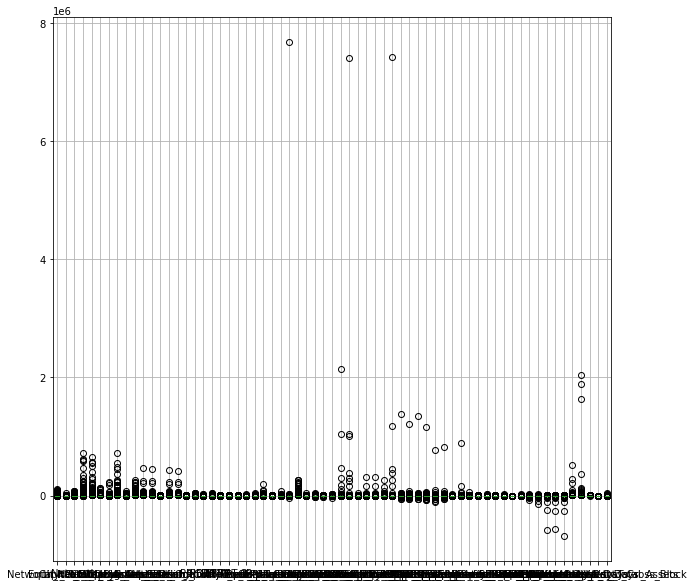

In [27]:
plt.figure(figsize=(10,10))
CompanyX.boxplot();

In [28]:
def remove_outlier(col):
    sorted(col)
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    lr=q1-(1.5*IQR)
    ur=q3+(1.5*IQR)
    return lr,ur

In [29]:
CompanyX.columns

Index(['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Gross_Block', 'Net_Working_Capital', 'Curr_Assets',
       'Curr_Liab_and_Prov', 'Total_Assets_to_Liab', 'Gross_Sales',
       'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Prod',
       'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT',
       'CP', 'Rev_earn_in_forex', 'Rev_exp_in_forex', 'Capital_exp_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv', 'Cash_Flow_From_Fin',
       'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Rev_earn_in_forex_perc',
       'ROG_Rev_exp_in_f

In [30]:
for col in CompanyX.columns:
    low_r,upper_r= remove_outlier(CompanyX[col])
    CompanyX[col]=np.where(CompanyX[col]<  low_r,  low_r,CompanyX[col])
    CompanyX[col]=np.where(CompanyX[col]>upper_r,upper_r,CompanyX[col])

In [31]:
CompanyX.isnull().sum().sum()

118

In [32]:
CompanyX.columns

Index(['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Gross_Block', 'Net_Working_Capital', 'Curr_Assets',
       'Curr_Liab_and_Prov', 'Total_Assets_to_Liab', 'Gross_Sales',
       'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Prod',
       'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT',
       'CP', 'Rev_earn_in_forex', 'Rev_exp_in_forex', 'Capital_exp_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv', 'Cash_Flow_From_Fin',
       'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Rev_earn_in_forex_perc',
       'ROG_Rev_exp_in_f

In [33]:
#CompanyX=CompanyX.drop(['Networth_Next_Year','Networth', 'Capital_Employed','Gross_Block','Gross_Sales','Net_Sales','Cost_of_Prod','PBIDT' ,'PBDT', 'PBIT', 'PBT', 'PAT','CP', 'Rev_earn_in_forex', 'Rev_exp_in_forex'],axis=1)

In [34]:
Company1=pd.concat([CompanyX,CompanyY],axis=1)

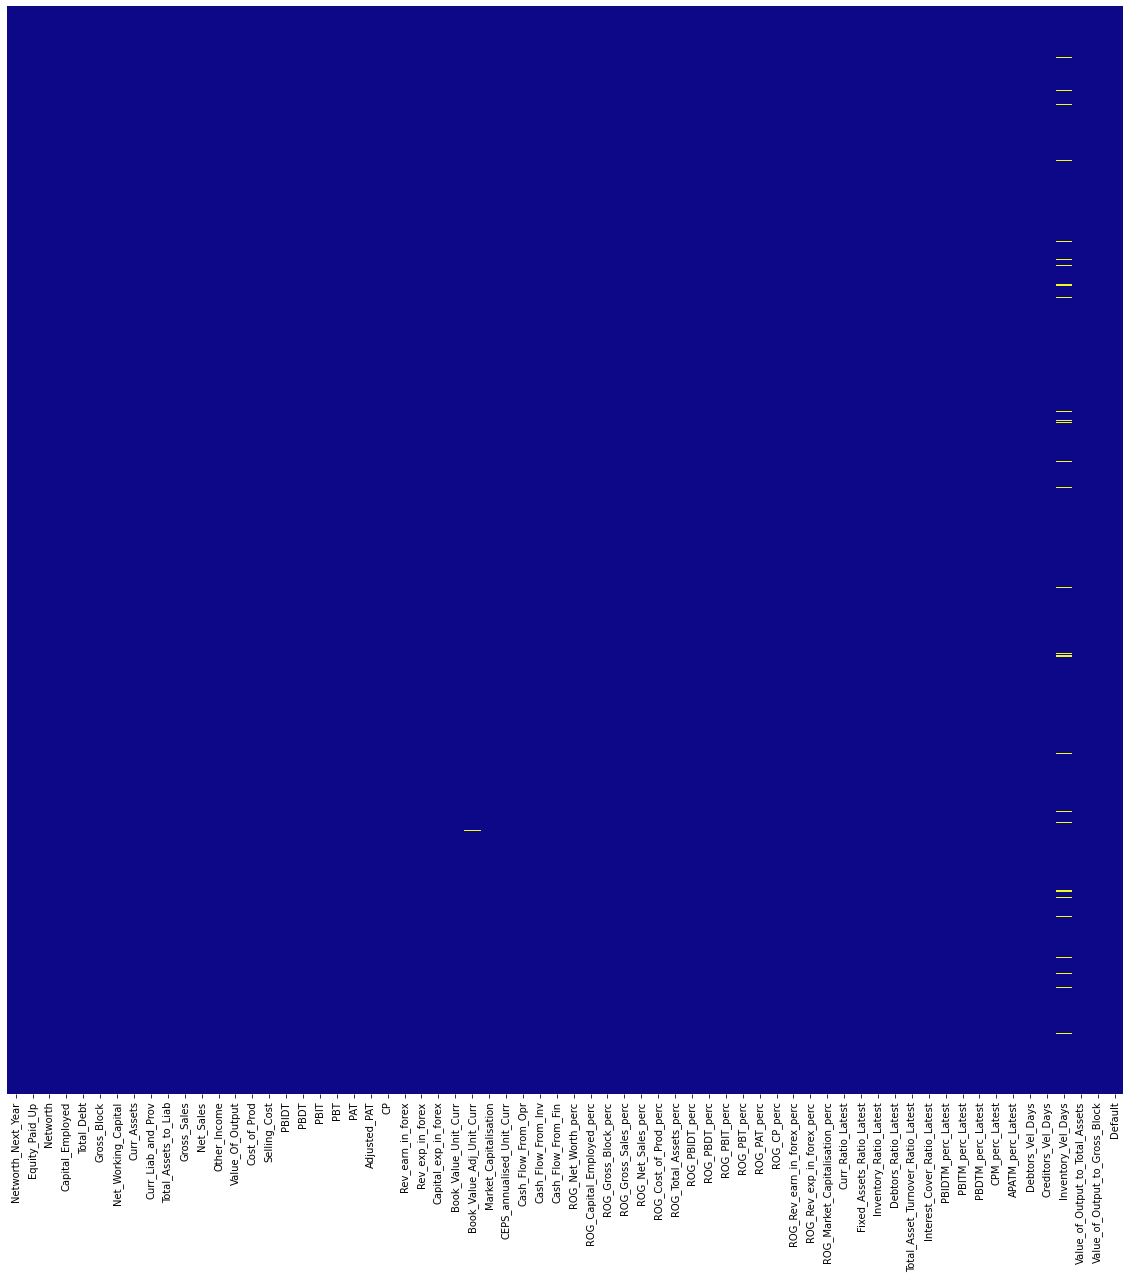

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(Company1.isnull(),cbar=False,cmap='plasma',yticklabels=False);

In [36]:
Company1.isnull().sum().sort_values(ascending=False)/Company1.index.size

Inventory_Vel_Days          0.03
Book_Value_Adj_Unit_Curr    0.00
Fixed_Assets_Ratio_Latest   0.00
PBITM_perc_Latest           0.00
Curr_Ratio_Latest           0.00
                            ... 
Market_Capitalisation       0.00
CEPS_annualised_Unit_Curr   0.00
Cash_Flow_From_Opr          0.00
Cash_Flow_From_Inv          0.00
Default                     0.00
Length: 66, dtype: float64

In [37]:
Company1.duplicated().sum()

0

In [38]:
Company1.Default.sum()

388

In [39]:
Company2=Company1.drop(['ROG_Rev_exp_in_forex_perc','ROG_Rev_earn_in_forex_perc'],axis=1)

In [40]:
Company2.shape

(3586, 64)

In [41]:
x=Company2.drop(['Default'],axis=1)
y=Company2['Default']

In [42]:
x.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,-175.74,43.17,-166.22,-320.90,180.83,328.88,-89.41,40.50,163.03,109.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00,0.00,0.00
1,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-10.30,-39.74,-57.74,-57.74,-87.18,29.00,101.00,2.00,0.31,0.24
2,-175.74,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97.00,210.50,0.00,-0.03,-0.26
3,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-3.33,-7.21,-48.13,-47.70,-51.58,93.00,63.00,2.00,0.24,1.90
4,-175.74,43.17,-166.22,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-295.55,-400.55,-845.88,379.79,274.79,253.00,210.50,0.00,0.01,0.05


In [43]:
x1=x
x1

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
0,-175.74,43.17,-166.22,-320.90,180.83,328.88,-89.41,40.50,163.03,109.60,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,45.00,0.00,0.00
1,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-10.30,-39.74,-57.74,-57.74,-87.18,29.00,101.00,2.00,0.31,0.24
2,-175.74,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97.00,210.50,0.00,-0.03,-0.26
3,-175.74,43.17,-166.22,555.11,180.83,328.88,-89.41,332.19,163.03,760.52,...,-3.33,-7.21,-48.13,-47.70,-51.58,93.00,63.00,2.00,0.24,1.90
4,-175.74,43.17,-166.22,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,-295.55,-400.55,-845.88,379.79,274.79,253.00,210.50,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3581,303.53,43.17,287.41,555.11,180.83,328.88,0.00,332.19,163.03,760.52,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.60,7.76
3582,303.53,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,39.92,32.17,29.81,30.52,22.77,13.00,53.00,77.00,0.29,1.00
3583,303.53,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,8.09,6.69,7.31,5.69,4.29,7.00,30.00,48.00,1.42,3.24
3584,303.53,43.17,287.41,555.11,180.83,328.88,151.52,332.19,163.03,760.52,...,28.12,20.55,23.39,19.55,11.99,32.00,69.00,42.00,0.36,0.68


# Scaling the Variables

In [44]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
scaled_x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)

In [45]:
Company3=pd.concat([scaled_x1,y],axis=1)

In [46]:
Company3.columns

Index(['Networth_Next_Year', 'Equity_Paid_Up', 'Networth', 'Capital_Employed',
       'Total_Debt', 'Gross_Block', 'Net_Working_Capital', 'Curr_Assets',
       'Curr_Liab_and_Prov', 'Total_Assets_to_Liab', 'Gross_Sales',
       'Net_Sales', 'Other_Income', 'Value_Of_Output', 'Cost_of_Prod',
       'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT', 'Adjusted_PAT',
       'CP', 'Rev_earn_in_forex', 'Rev_exp_in_forex', 'Capital_exp_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Opr', 'Cash_Flow_From_Inv', 'Cash_Flow_From_Fin',
       'ROG_Net_Worth_perc', 'ROG_Capital_Employed_perc',
       'ROG_Gross_Block_perc', 'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Prod_perc', 'ROG_Total_Assets_perc', 'ROG_PBIDT_perc',
       'ROG_PBDT_perc', 'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc',
       'ROG_CP_perc', 'ROG_Market_Capitalisation_perc', 'Curr_Ratio_Latest',

In [47]:
Company3.describe().T

,count,mean,std,min,25%,50%,75%,max
Networth_Next_Year,3586.00,-0.00,1.00,-2.10,-0.61,-0.48,0.39,1.88
Equity_Paid_Up,3586.00,-0.00,1.00,-1.00,-0.73,-0.41,0.39,2.08
Networth,3586.00,0.00,1.00,-2.12,-0.62,-0.49,0.39,1.89
Capital_Employed,3586.00,-0.00,1.00,-2.28,-0.70,-0.55,0.36,1.94
Total_Debt,3586.00,0.00,1.00,-0.71,-0.70,-0.59,0.37,1.96
...,...,...,...,...,...,...,...,...
Creditors_Vel_Days,3586.00,0.00,1.00,-0.92,-0.80,-0.34,0.39,2.17
Inventory_Vel_Days,3483.00,-0.00,1.00,-2.02,-0.58,-0.32,0.12,6.65
Value_of_Output_to_Total_Assets,3586.00,0.00,1.00,-1.37,-0.85,-0.32,0.55,2.66
Value_of_Output_to_Gross_Block,3586.00,-0.00,1.00,-2.45,-0.75,-0.45,0.38,2.08


In [48]:
from sklearn.model_selection import train_test_split
Train,Test=train_test_split(Company3,test_size=0.33,stratify=Company3.Default)

## Imputing the missing values

In [49]:
from sklearn.impute import KNNImputer

In [50]:
imputer=KNNImputer(n_neighbors=5)

In [51]:
Company_imputed_train=pd.DataFrame(imputer.fit_transform(Train),columns=Train.columns)
Company_imputed_test=pd.DataFrame(imputer.fit_transform(Test),columns=Test.columns)

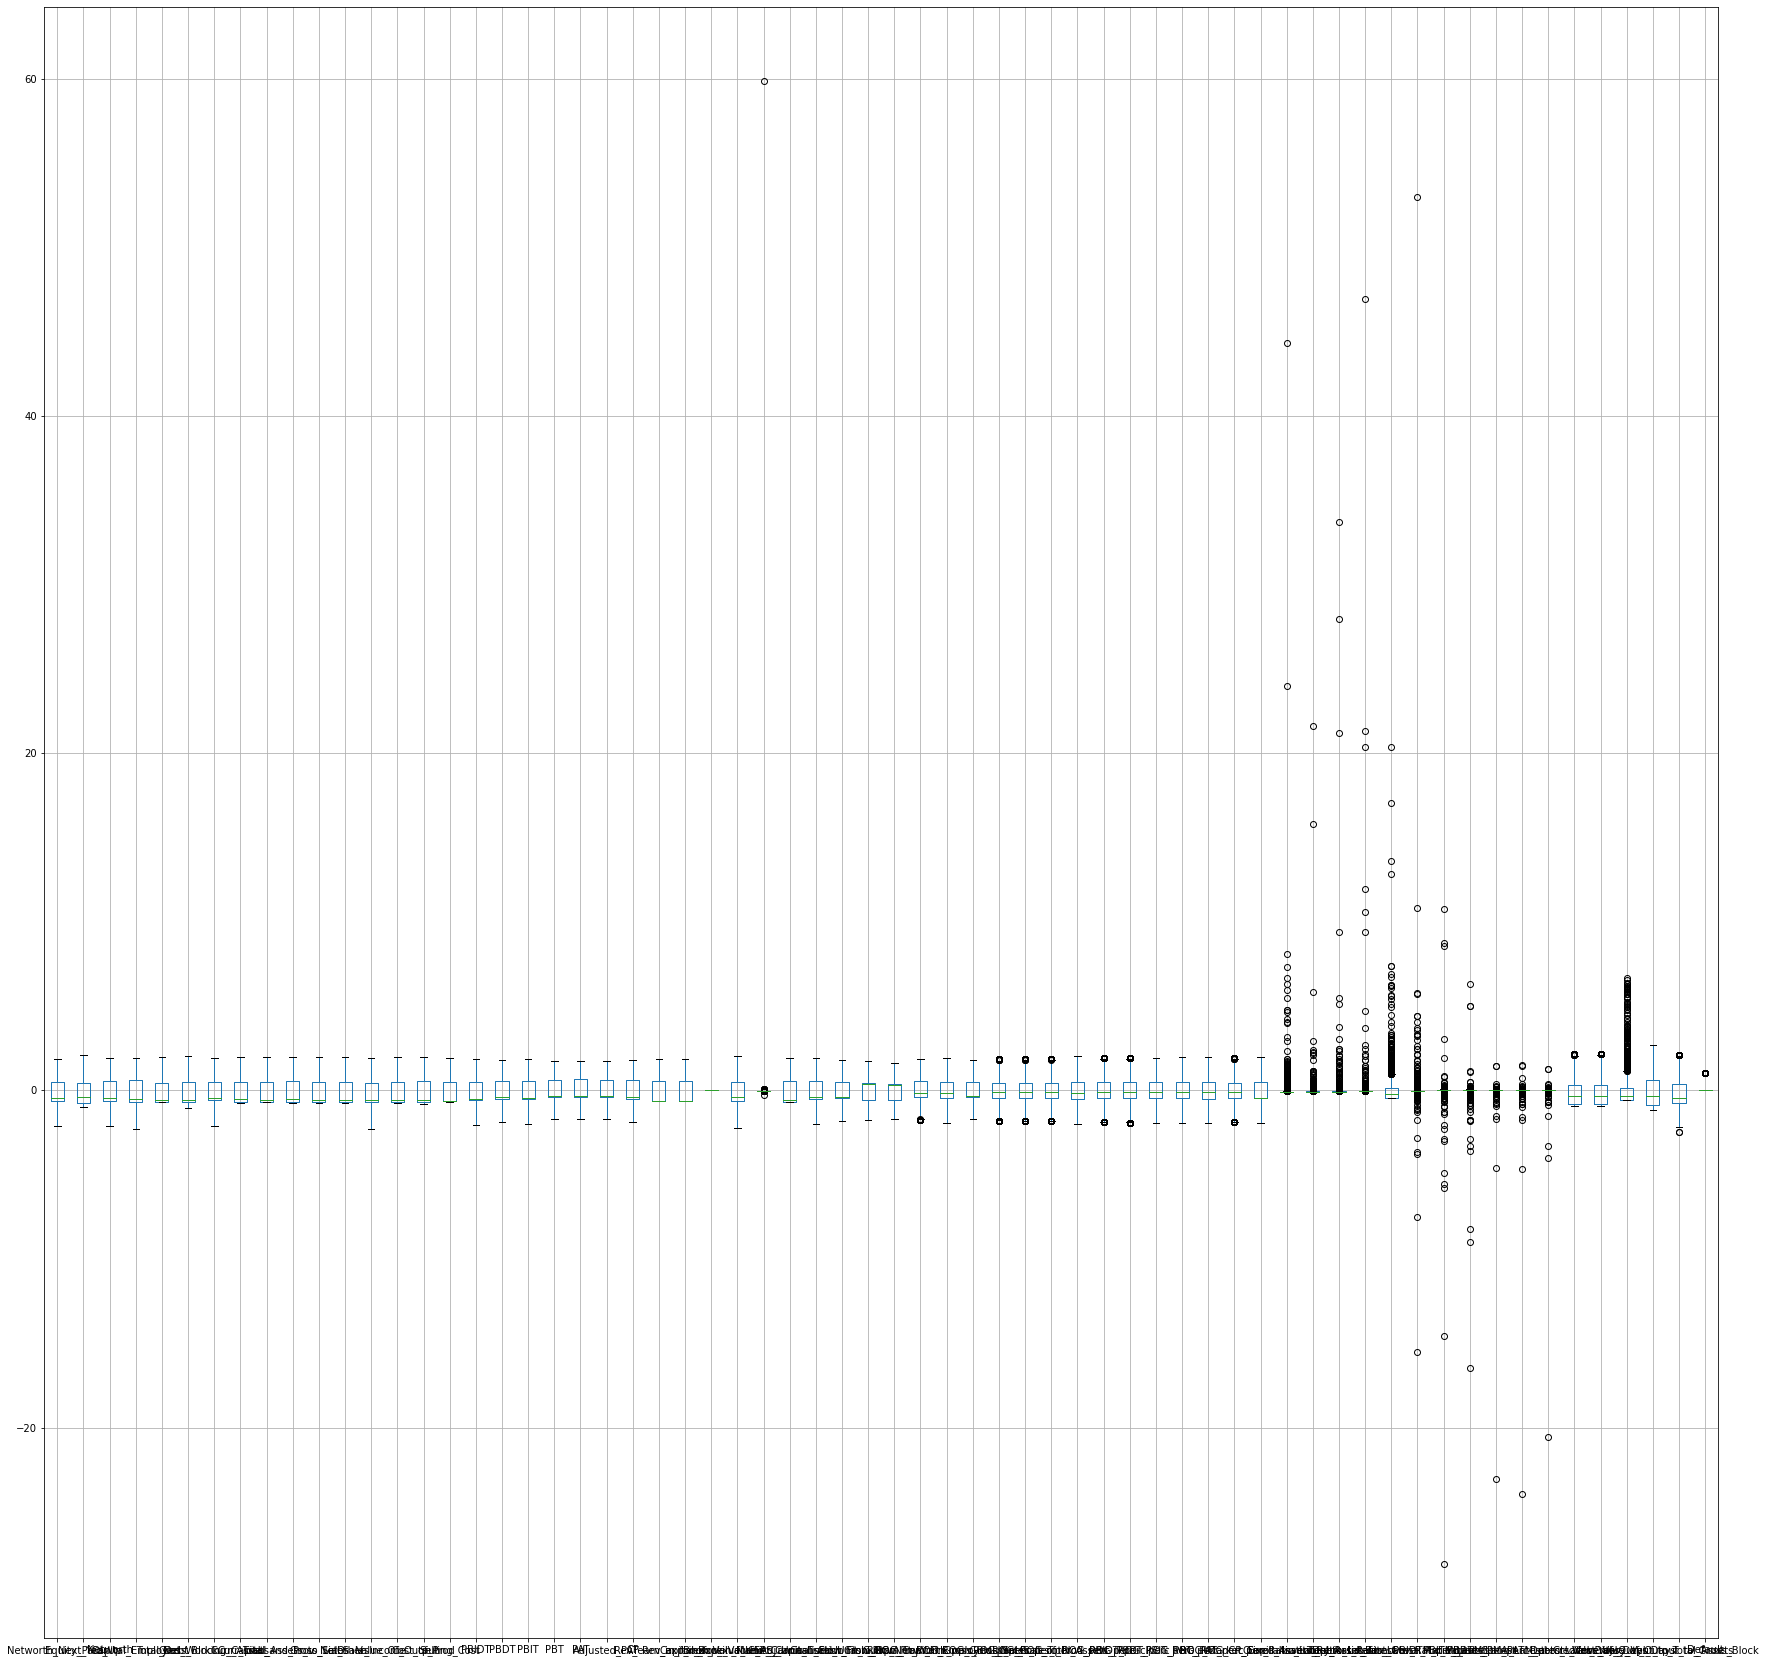

In [52]:
plt.figure(figsize=(30,30))
Company_imputed_train.boxplot();

In [53]:
print(Company_imputed_train.isnull().sum().sum())
print(Company_imputed_test.isnull().sum().sum())

0
0


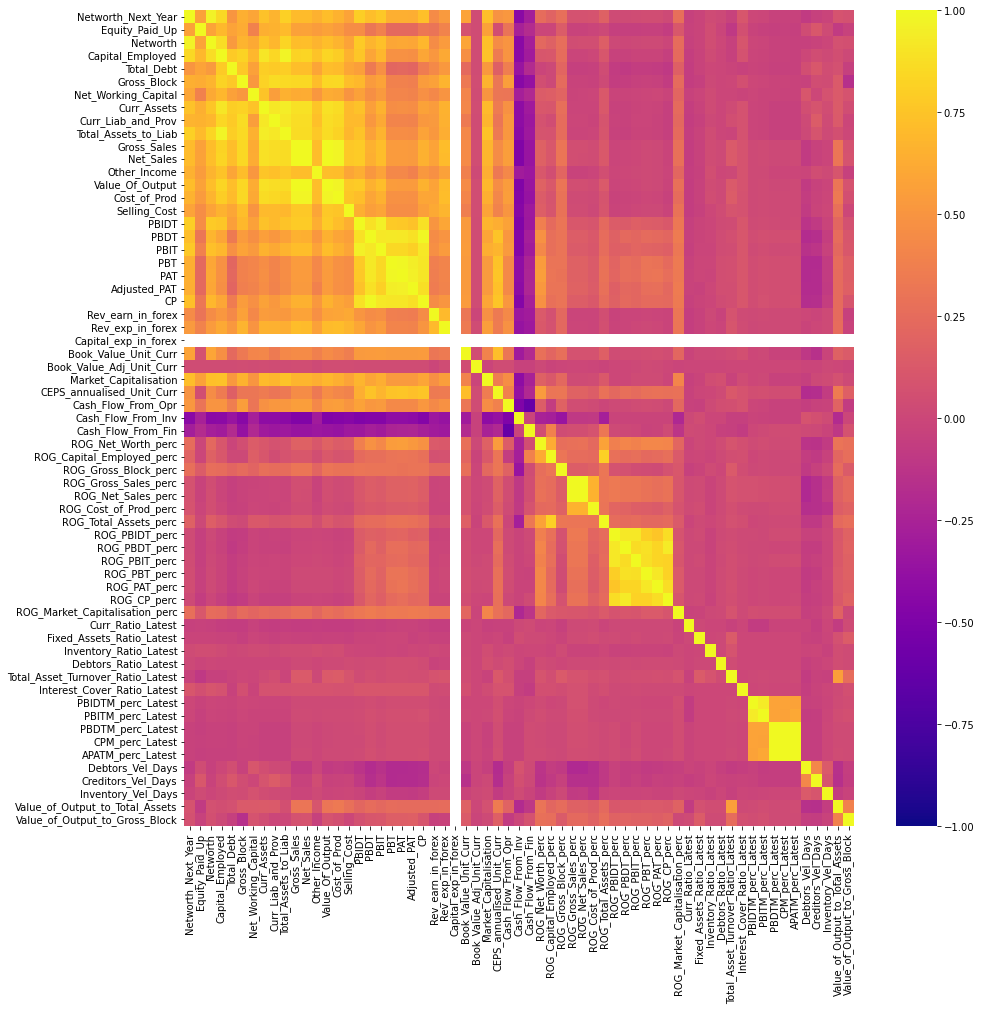

In [54]:
plt.figure(figsize=(15,15))
corr=Train.drop(['Default'],axis=1).corr()
sns.heatmap(corr,cmap='plasma',vmin=-1,vmax=1);


In [55]:
Company_imputed_train.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
0,1.88,2.08,1.89,1.94,-0.70,2.01,1.93,1.97,1.96,1.97,...,0.04,0.03,0.03,0.03,-0.83,-0.07,0.47,1.02,0.43,0.00
1,1.88,-0.40,1.89,1.66,-0.70,-0.64,-0.43,-0.59,-0.57,1.06,...,0.07,0.04,0.04,0.04,-0.92,-0.49,-0.58,-0.87,-0.19,0.00
2,0.27,-0.32,0.05,-0.11,0.04,-0.35,1.18,0.43,-0.10,-0.15,...,0.04,0.03,0.03,0.03,-0.50,-0.87,-0.16,2.61,2.08,0.00
3,-0.74,-0.54,-0.70,-0.58,-0.16,-0.05,-0.60,-0.49,-0.21,-0.52,...,0.04,0.03,0.03,0.03,1.33,2.17,1.82,0.89,-0.45,1.00
4,1.88,2.08,1.89,1.94,1.96,2.01,-0.62,1.97,1.96,1.97,...,0.04,0.03,0.03,0.03,-0.92,-0.92,-0.58,0.18,0.90,0.00


In [56]:
Company_imputed_test.head()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Curr_Assets,Curr_Liab_and_Prov,Total_Assets_to_Liab,...,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Vel_Days,Creditors_Vel_Days,Inventory_Vel_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block,Default
0,0.20,0.72,0.25,-0.15,-0.42,0.75,-0.72,-0.54,-0.20,-0.20,...,0.04,0.03,0.03,0.03,-0.19,-0.04,-0.14,-0.18,-0.66,0.00
1,1.12,0.98,0.47,0.11,-0.10,-0.02,0.77,1.04,1.53,0.37,...,0.04,0.03,0.03,0.03,-0.03,0.39,-0.10,0.86,0.84,0.00
2,1.88,2.08,1.89,1.94,1.14,2.01,1.93,1.97,1.96,1.97,...,0.04,0.03,0.03,0.03,-0.20,-0.02,-0.04,-0.18,1.20,0.00
3,0.10,-0.21,1.26,1.94,1.96,2.01,0.97,0.22,-0.32,1.47,...,0.04,0.03,0.03,0.03,-0.39,-0.78,-0.15,-0.34,-0.65,0.00
4,1.88,2.08,1.89,1.94,-0.70,2.01,-2.13,1.97,1.96,1.97,...,0.04,0.03,0.03,0.03,-0.92,-0.61,-0.58,-0.53,2.08,0.00


In [57]:
Company_imputed_train.shape

(2402, 64)

In [58]:
Company_imputed_test.shape

(1184, 64)

In [59]:
import statsmodels.api as sm

In [60]:
X=Company_imputed_train.drop(['Default'],axis=1)
Y=Company_imputed_train['Default']